# Data Loading and Ploting

In [1]:
DataSet_path = "/kaggle/input/city-life-dataset/P05. Citylife"

## Loading Rush Hours

In [2]:
import os
import pandas as pd
import numpy as np

rush_hours_df = pd.read_csv(os.path.join(DataSet_path, "rush_hours_empty.csv"))
rush_hours_df

,name,longitude,latitude,num_of_rides,Trip End Timestamp
0,someplace,-87.354944,41.984939,17,21.04.2018 16:00:00


## Loading Taxi Locations

In [3]:
taxi_locations_df = pd.read_csv(os.path.join(DataSet_path, "taxi_locations.csv"))
taxi_locations_df

,Trip ID,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Trip Start Timestamp,Trip End Timestamp,Taxi ID,Fare
0,304a88bf5d8a7d60c1dbfd88661caa15ee4cb0ea,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.778877,-87.594925,POINT (-87.5949254391 41.7788768603),10/12/2014 08:30:00 PM,10/12/2014 08:45:00 PM,ada14d22a0c2f8c7fe79140611a8e76602acdd8b448282...,19.25
1,b1a8b95ea294663cc3d3cb38a538f464418288c4,41.947792,-87.683835,POINT (-87.6838349425 41.9477915865),41.874005,-87.663518,POINT (-87.6635175498 41.874005383),10/12/2014 08:30:00 PM,10/12/2014 08:45:00 PM,92ab37c26efa3b2659e525a0a2ae31e69c84ffd7bcfef2...,13.05
2,752c8ac4bdf62db4c3d4e810cab915a0ec0ceddc,42.001571,-87.695013,POINT (-87.6950125892 42.001571027),42.001571,-87.695013,POINT (-87.6950125892 42.001571027),09/09/2014 06:00:00 PM,09/09/2014 06:00:00 PM,d06d9962fe86645dd59a7dce41cf27734b23dc62974283...,4.85
3,6808fa8dc0d009190da2e2416203a7ba012f45a9,41.901567,-87.638404,POINT (-87.6384040116 41.9015669095),41.901567,-87.638404,POINT (-87.6384040116 41.9015669095),10/12/2014 06:30:00 AM,10/12/2014 06:30:00 AM,26d0351db732d6b194d3ae9f29b4a3c53070fdd14aa3c9...,3.25
4,01428cb986d678ea0a8d39b6b35d05d06baa631a,41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),09/07/2014 05:45:00 PM,09/07/2014 06:45:00 PM,25b37d641316c0ca5cb44edf8eaf9f012e2495549f60b7...,38.25
...,...,...,...,...,...,...,...,...,...,...,...
2506289,21bc604a66e2c479f767bdfd6ddfec6a7b57065b,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),06/16/2019 10:30:00 PM,06/16/2019 11:00:00 PM,f6591bb5699bde5f19f3074a76774808dd0e5c941ee0ed...,44.25
2506290,21beff87d222ce3c0e1c62f9278c1ed8a455550a,41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),06/03/2019 11:00:00 AM,06/03/2019 11:15:00 AM,6161b78168fb8a51b06c3994f62522e1d21390a969e3b1...,4.25
2506291,21baf5e9060fb66f7b5e11444d32d07275a3a2ee,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),06/15/2019 01:45:00 PM,06/15/2019 01:45:00 PM,025c4a64d4348a8184bbf4109fea03a717b87f48029d95...,10.75
2506292,21bfa342fb04bdf42585c216c9da58cc5a6975f2,41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),06/05/2019 05:15:00 PM,06/05/2019 05:15:00 PM,e39f9fb04c45fac83b35fbc9c36b68ba97cdf877dd76fd...,5.75


In [4]:
taxi_locations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506294 entries, 0 to 2506293
Data columns (total 11 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Trip ID                     object 
 1   Pickup Centroid Latitude    float64
 2   Pickup Centroid Longitude   float64
 3   Pickup Centroid Location    object 
 4   Dropoff Centroid Latitude   float64
 5   Dropoff Centroid Longitude  float64
 6   Dropoff Centroid  Location  object 
 7   Trip Start Timestamp        object 
 8   Trip End Timestamp          object 
 9   Taxi ID                     object 
 10  Fare                        float64
dtypes: float64(5), object(6)
memory usage: 210.3+ MB


## Editing, Extracting DataTime Data

In [5]:
# Extracting hour, day of week, and month for temporal analysis
taxi_locations_df['Trip Start Timestamp'] = pd.to_datetime(taxi_locations_df['Trip Start Timestamp'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')
taxi_locations_df['Trip End Timestamp'] = pd.to_datetime(taxi_locations_df['Trip End Timestamp'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')
taxi_locations_df['Trip Start Hour'] = taxi_locations_df['Trip Start Timestamp'].dt.hour
taxi_locations_df['Trip Start Day'] = taxi_locations_df['Trip Start Timestamp'].dt.day_name()
taxi_locations_df['Trip Start Month'] = taxi_locations_df['Trip Start Timestamp'].dt.month_name()

# Count of trips by hour
hourly_trip_counts = taxi_locations_df['Trip Start Hour'].value_counts().sort_index()

# Count of trips by day of the week
daily_trip_counts = taxi_locations_df['Trip Start Day'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Count of trips by month
monthly_trip_counts = taxi_locations_df['Trip Start Month'].value_counts().sort_index()

In [6]:
taxi_locations_df

,Trip ID,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Trip Start Timestamp,Trip End Timestamp,Taxi ID,Fare,Trip Start Hour,Trip Start Day,Trip Start Month
0,304a88bf5d8a7d60c1dbfd88661caa15ee4cb0ea,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.778877,-87.594925,POINT (-87.5949254391 41.7788768603),2014-10-12 20:30:00,2014-10-12 20:45:00,ada14d22a0c2f8c7fe79140611a8e76602acdd8b448282...,19.25,20,Sunday,October
1,b1a8b95ea294663cc3d3cb38a538f464418288c4,41.947792,-87.683835,POINT (-87.6838349425 41.9477915865),41.874005,-87.663518,POINT (-87.6635175498 41.874005383),2014-10-12 20:30:00,2014-10-12 20:45:00,92ab37c26efa3b2659e525a0a2ae31e69c84ffd7bcfef2...,13.05,20,Sunday,October
2,752c8ac4bdf62db4c3d4e810cab915a0ec0ceddc,42.001571,-87.695013,POINT (-87.6950125892 42.001571027),42.001571,-87.695013,POINT (-87.6950125892 42.001571027),2014-09-09 18:00:00,2014-09-09 18:00:00,d06d9962fe86645dd59a7dce41cf27734b23dc62974283...,4.85,18,Tuesday,September
3,6808fa8dc0d009190da2e2416203a7ba012f45a9,41.901567,-87.638404,POINT (-87.6384040116 41.9015669095),41.901567,-87.638404,POINT (-87.6384040116 41.9015669095),2014-10-12 06:30:00,2014-10-12 06:30:00,26d0351db732d6b194d3ae9f29b4a3c53070fdd14aa3c9...,3.25,6,Sunday,October
4,01428cb986d678ea0a8d39b6b35d05d06baa631a,41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),2014-09-07 17:45:00,2014-09-07 18:45:00,25b37d641316c0ca5cb44edf8eaf9f012e2495549f60b7...,38.25,17,Sunday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506289,21bc604a66e2c479f767bdfd6ddfec6a7b57065b,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),2019-06-16 22:30:00,2019-06-16 23:00:00,f6591bb5699bde5f19f3074a76774808dd0e5c941ee0ed...,44.25,22,Sunday,June
2506290,21beff87d222ce3c0e1c62f9278c1ed8a455550a,41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),2019-06-03 11:00:00,2019-06-03 11:15:00,6161b78168fb8a51b06c3994f62522e1d21390a969e3b1...,4.25,11,Monday,June
2506291,21baf5e9060fb66f7b5e11444d32d07275a3a2ee,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),2019-06-15 13:45:00,2019-06-15 13:45:00,025c4a64d4348a8184bbf4109fea03a717b87f48029d95...,10.75,13,Saturday,June
2506292,21bfa342fb04bdf42585c216c9da58cc5a6975f2,41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),2019-06-05 17:15:00,2019-06-05 17:15:00,e39f9fb04c45fac83b35fbc9c36b68ba97cdf877dd76fd...,5.75,17,Wednesday,June


## Ploting Trips Number By DataTime Type

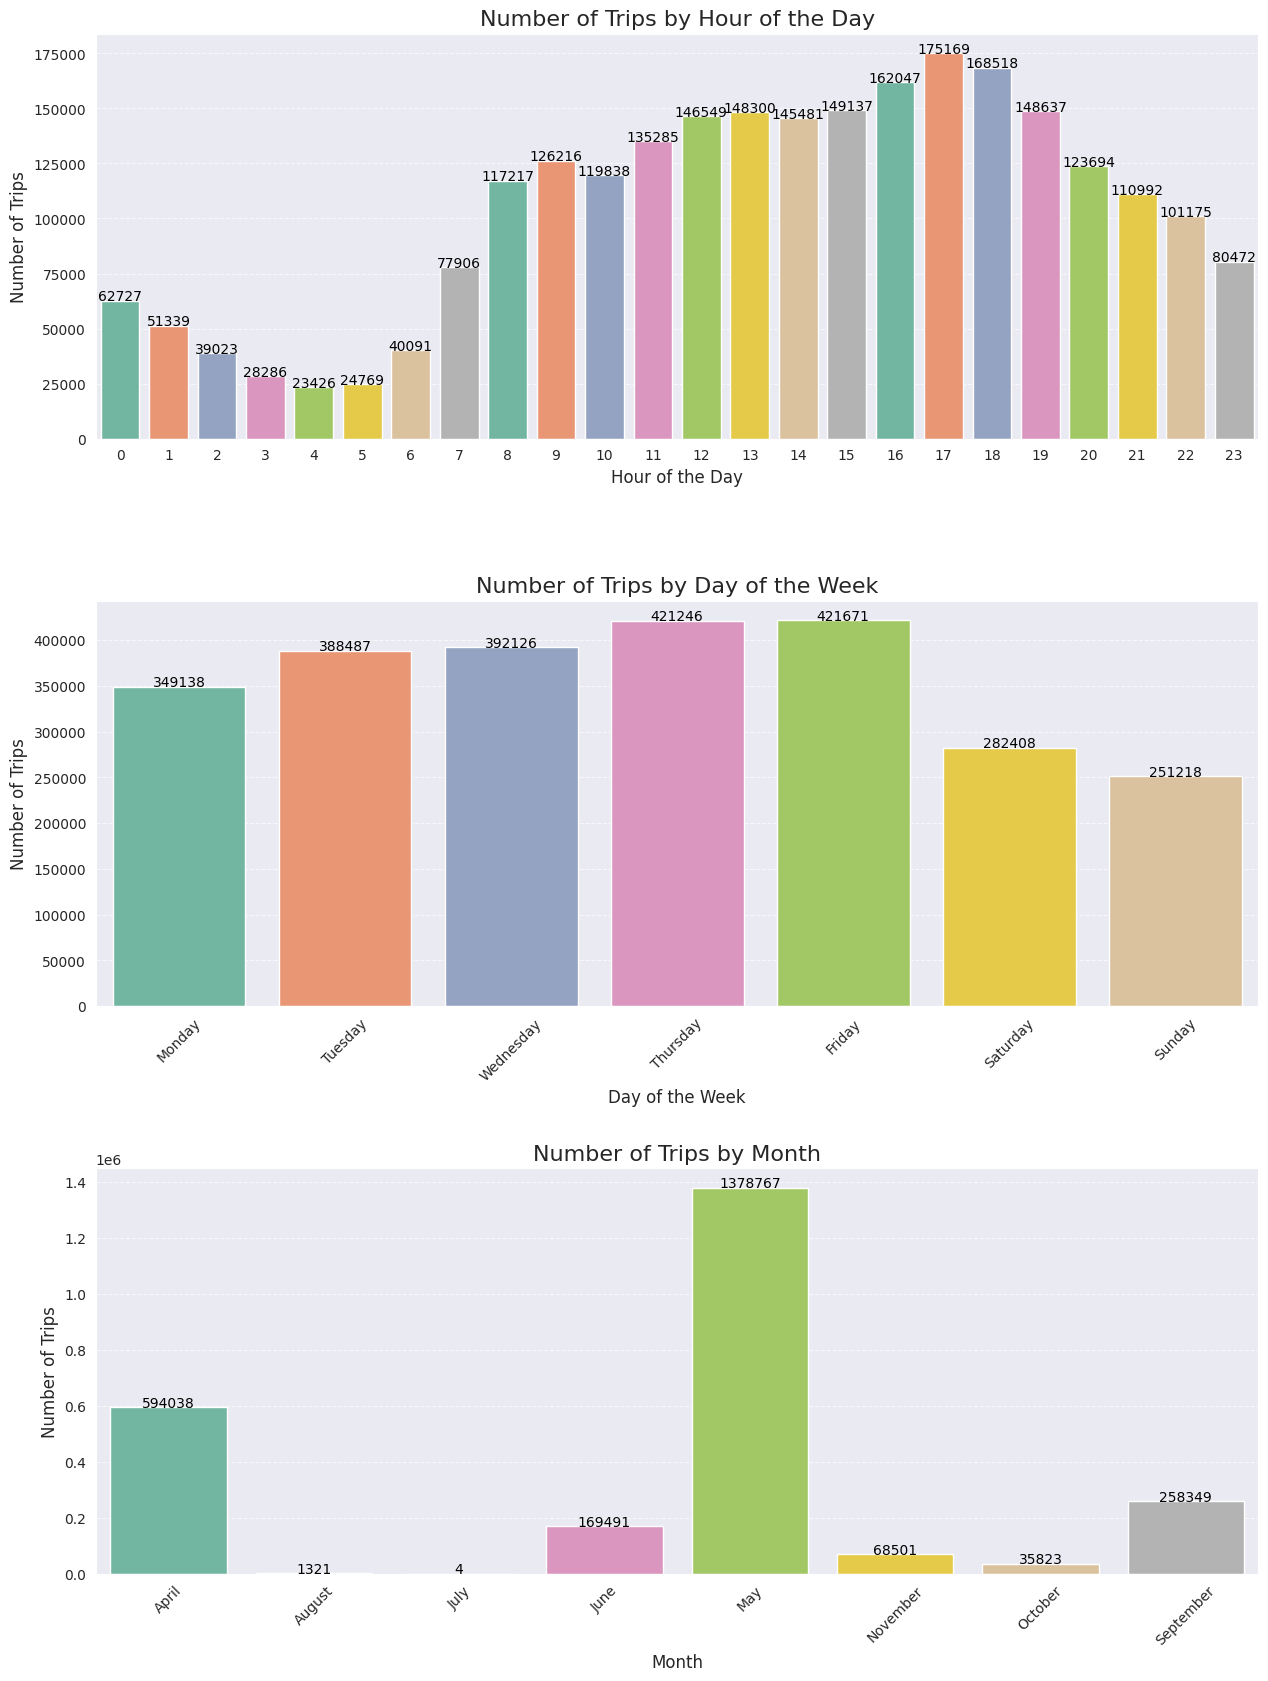

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")
colors = sns.color_palette("Set2", 8)

# Create a single figure for all three plots
fig, axes = plt.subplots(3, 1, figsize=(15, 20), gridspec_kw={'hspace': 0.4})

# Plotting Number of Trips by Hour
sns.barplot(x=hourly_trip_counts.index, y=hourly_trip_counts.values, ax=axes[0], palette=colors)
axes[0].set_title('Number of Trips by Hour of the Day', fontsize=16)
axes[0].set_xlabel('Hour of the Day', fontsize=12)
axes[0].set_ylabel('Number of Trips', fontsize=12)
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the peaks
for i, value in enumerate(hourly_trip_counts.values):
    axes[0].text(i, value + 5, f'{value}', ha='center', fontsize=10, color='black')

# Plotting Number of Trips by Day of the Week
sns.barplot(x=daily_trip_counts.index, y=daily_trip_counts.values, ax=axes[1], palette=colors)
axes[1].set_title('Number of Trips by Day of the Week', fontsize=16)
axes[1].set_xlabel('Day of the Week', fontsize=12)
axes[1].set_ylabel('Number of Trips', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the peaks
for i, value in enumerate(daily_trip_counts.values):
    axes[1].text(i, value + 5, f'{value}', ha='center', fontsize=10, color='black')

# Plotting Number of Trips by Month
sns.barplot(x=monthly_trip_counts.index, y=monthly_trip_counts.values, ax=axes[2], palette=colors)
axes[2].set_title('Number of Trips by Month', fontsize=16)
axes[2].set_xlabel('Month', fontsize=12)
axes[2].set_ylabel('Number of Trips', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the peaks
for i, value in enumerate(monthly_trip_counts.values):
    axes[2].text(i, value + 5, f'{value}', ha='center', fontsize=10, color='black')

# Display the plots
plt.show()

# Most popular areas

# Loading PickPoints and DropOffs

In [8]:
pickpoints_df = taxi_locations_df[["Pickup Centroid Latitude", "Pickup Centroid Longitude"]].dropna()
drop_offs_df = taxi_locations_df[["Dropoff Centroid Latitude", "Dropoff Centroid Longitude"]].dropna()
pickpoints_df.reset_index(inplace=True)
drop_offs_df.reset_index(inplace=True)

## Clustering Analysis Of Pick Point And Drop Of

- Conduct clustering analysis of pick point and drop off locations based on their
coordinates. Clusters might be different for each of the categories (pickpoints and
drop-offs).

```
FAISS KMeans Choice Argument:
Because it’s fast, GPU-capable, and ideal for huge datasets.
```

In [9]:
%%capture

!pip install faiss-cpu

In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPoint
import faiss
import numpy as np

pickup_coords = taxi_locations_df[['Pickup Centroid Longitude', 'Pickup Centroid Latitude']].dropna()
dropoff_coords = taxi_locations_df[['Dropoff Centroid Longitude', 'Dropoff Centroid Latitude']].dropna()

pickup_coords.reset_index(drop=True, inplace=True)
dropoff_coords.reset_index(drop=True, inplace=True)

In [11]:
from sklearn.preprocessing import StandardScaler

def faiss_kmeans(data, n_clusters):
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(data).astype(np.float32)

    kmeans = faiss.Kmeans(d=data_normalized.shape[1], k=n_clusters, niter=300, nredo=10, gpu=(faiss.get_num_gpus() > 0))
    kmeans.train(data_normalized)

    _, labels = kmeans.index.search(data_normalized, 1)
    return labels.ravel(), kmeans.centroids

optimal_k_pickup = 5
pickup_labels, pickup_centroids = faiss_kmeans(pickup_coords.values, optimal_k_pickup)

optimal_k_dropoff = 4
dropoff_labels, dropoff_centroids = faiss_kmeans(dropoff_coords.values, optimal_k_dropoff)

pickup_labels = pd.Series(pickup_labels, index=pickup_coords.index)
dropoff_labels = pd.Series(dropoff_labels, index=dropoff_coords.index)

## Creating GeoDataFrame

In [12]:
pickup_gdf = gpd.GeoDataFrame(
    pickup_coords,
    geometry=gpd.points_from_xy(
        pickup_coords['Pickup Centroid Longitude'],
        pickup_coords['Pickup Centroid Latitude']
    )
)
dropoff_gdf = gpd.GeoDataFrame(
    dropoff_coords,
    geometry=gpd.points_from_xy(
        dropoff_coords['Dropoff Centroid Longitude'],
        dropoff_coords['Dropoff Centroid Latitude']
    )
)

pickup_gdf['cluster'] = pickup_labels.values
dropoff_gdf['cluster'] = dropoff_labels.values

In [13]:
pickup_gdf

,Pickup Centroid Longitude,Pickup Centroid Latitude,geometry,cluster
0,-87.625192,41.878866,POINT (-87.62519 41.87887),2
1,-87.683835,41.947792,POINT (-87.68383 41.94779),0
2,-87.695013,42.001571,POINT (-87.69501 42.00157),0
3,-87.638404,41.901567,POINT (-87.63840 41.90157),4
4,-87.631864,41.892042,POINT (-87.63186 41.89204),4
...,...,...,...,...
2506289,-87.903040,41.979071,POINT (-87.90304 41.97907),3
2506290,-87.649489,41.922686,POINT (-87.64949 41.92269),4
2506291,-87.642649,41.879255,POINT (-87.64265 41.87926),2
2506292,-87.620993,41.884987,POINT (-87.62099 41.88499),2


## Convert Multi Points to a Hull

In [14]:
# Proceed with compute_convex_hulls function
def compute_convex_hulls(gdf, cluster_label):
    cluster_hulls = []
    for cluster_id in gdf[cluster_label].unique():
        points = gdf[gdf[cluster_label] == cluster_id]['geometry']
        if len(points) > 2:  # Convex hull requires at least 3 points
            hull = MultiPoint(list(points)).convex_hull
            cluster_hulls.append({'cluster': cluster_id, 'geometry': hull})
    return gpd.GeoDataFrame(cluster_hulls)

pickup_hulls = compute_convex_hulls(pickup_gdf, 'cluster')
dropoff_hulls = compute_convex_hulls(dropoff_gdf, 'cluster')

## Counting Density of eash Area

In [15]:
pickup_cluster_sizes = pickup_gdf.groupby('cluster').size().reset_index(name='counts')
pickup_hulls = pickup_hulls.merge(pickup_cluster_sizes, on='cluster')

dropoff_cluster_sizes = dropoff_gdf.groupby('cluster').size().reset_index(name='counts')
dropoff_hulls = dropoff_hulls.merge(dropoff_cluster_sizes, on='cluster')

## Plotting Area(hull), Centroids with density-based color scales

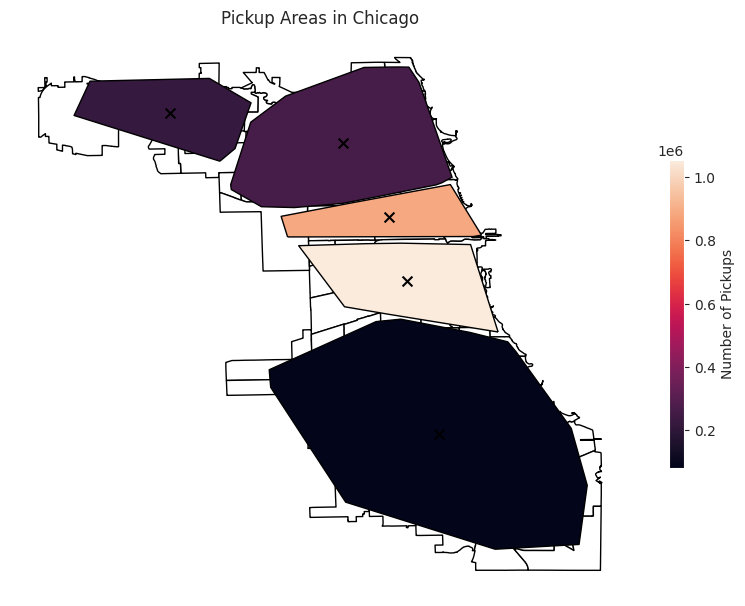

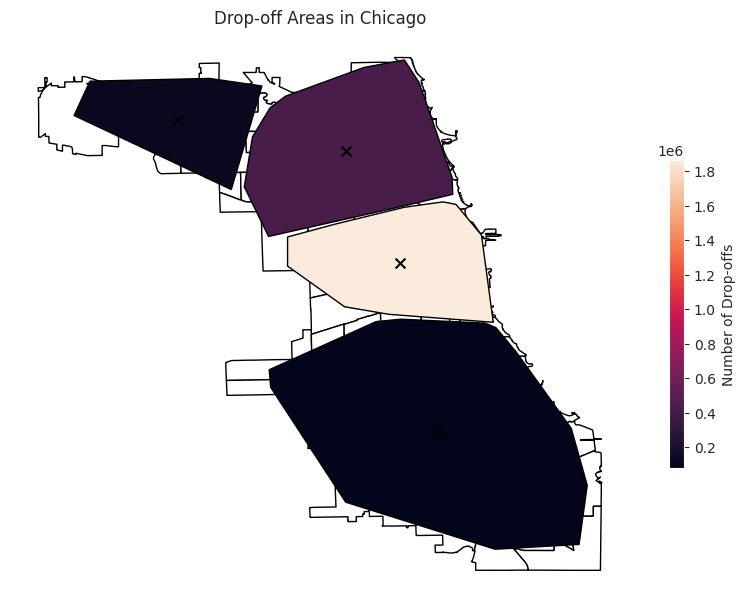

In [16]:
chicago_map = gpd.read_file(f'{DataSet_path}/chicago_map.shp')
for data_type, hulls, title in [('Pickup', pickup_hulls, 'Pickup Areas in Chicago'), ('Drop-off', dropoff_hulls, 'Drop-off Areas in Chicago')]:
    fig, ax = plt.subplots(figsize=(10,10))
    chicago_map.plot(ax=ax, color='white', edgecolor='black')
    hulls.plot(ax=ax, column='counts', edgecolor='black', legend=True, legend_kwds={'label': f"Number of {data_type}s", 'shrink': 0.4})
    centroids = hulls.copy()
    centroids['geometry'] = hulls.centroid
    centroids.plot(ax=ax, color='black', markersize=50, marker='x')
    ax.set_title(title)
    ax.axis('off')
    plt.show()

# Most popular routes

## Extracting Pickup,DropOff coords

In [17]:
pickup_coordinates = taxi_locations_df[['Pickup Centroid Latitude', 'Pickup Centroid Longitude']].values
dropoff_coordinates = taxi_locations_df[['Dropoff Centroid Latitude', 'Dropoff Centroid Longitude']].values

# Merge coords and Clustring the data

In [18]:
coordinates = np.vstack((pickup_coordinates, dropoff_coordinates))
n_clusters = 5
kmeans_faiss = faiss.Kmeans(d=coordinates.shape[1], k=n_clusters, niter=20, verbose=True)
kmeans_faiss.train(coordinates)

Sampling a subset of 1280 / 5012588 for training
Clustering 1280 points in 2D to 5 clusters, redo 1 times, 20 iterations
  Preprocessing in 0.22 s


1.234375

## Ploting the Centroids of eash Area

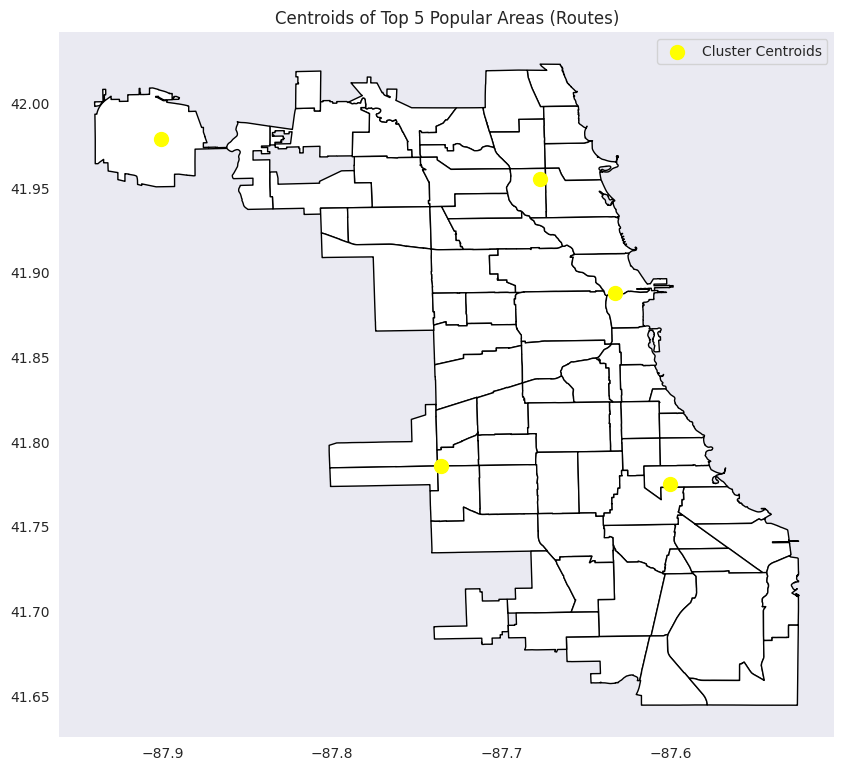

In [19]:
centroids = kmeans_faiss.centroids

centroids_gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(centroids[:, 1], centroids[:, 0]))

fig, ax = plt.subplots(figsize=(10, 10))
chicago_map.plot(ax=ax, color='white', edgecolor='black', legend=True)  # Plot the city map
for _, spine in ax.spines.items():
    spine.set_visible(False)
centroids_gdf.plot(ax=ax, color='yellow', marker='o', markersize=100, label='Cluster Centroids')  # Plot centroids

plt.title(f"Centroids of Top {n_clusters} Popular Areas (Routes)")
plt.legend()

plt.show()

In [20]:
%%capture
!pip install osmnx
!pip install --upgrade geopandas

## Extracting Routes using osmnx Library

In [21]:
import osmnx as ox
import networkx as nx

# Load the street network for Chicago
place_name = "Chicago, Illinois, USA"
gdf = ox.geocode_to_gdf(place_name)
Map_polygon = gdf.unary_union
GeoData = ox.graph_from_polygon(Map_polygon, network_type="drive")
# Find the nearest nodes in the road network for each centroid
centroid_nodes = [ox.distance.nearest_nodes(GeoData, lon, lat) for lat, lon in centroids]

# Calculate the shortest path between each pair of centroid nodes
routes = []
for i in range(len(centroid_nodes) - 1):
    route = nx.shortest_path(GeoData, centroid_nodes[i], centroid_nodes[i+1], weight='length')
    routes.append(route)

## Ploting Routes in Chicago Map

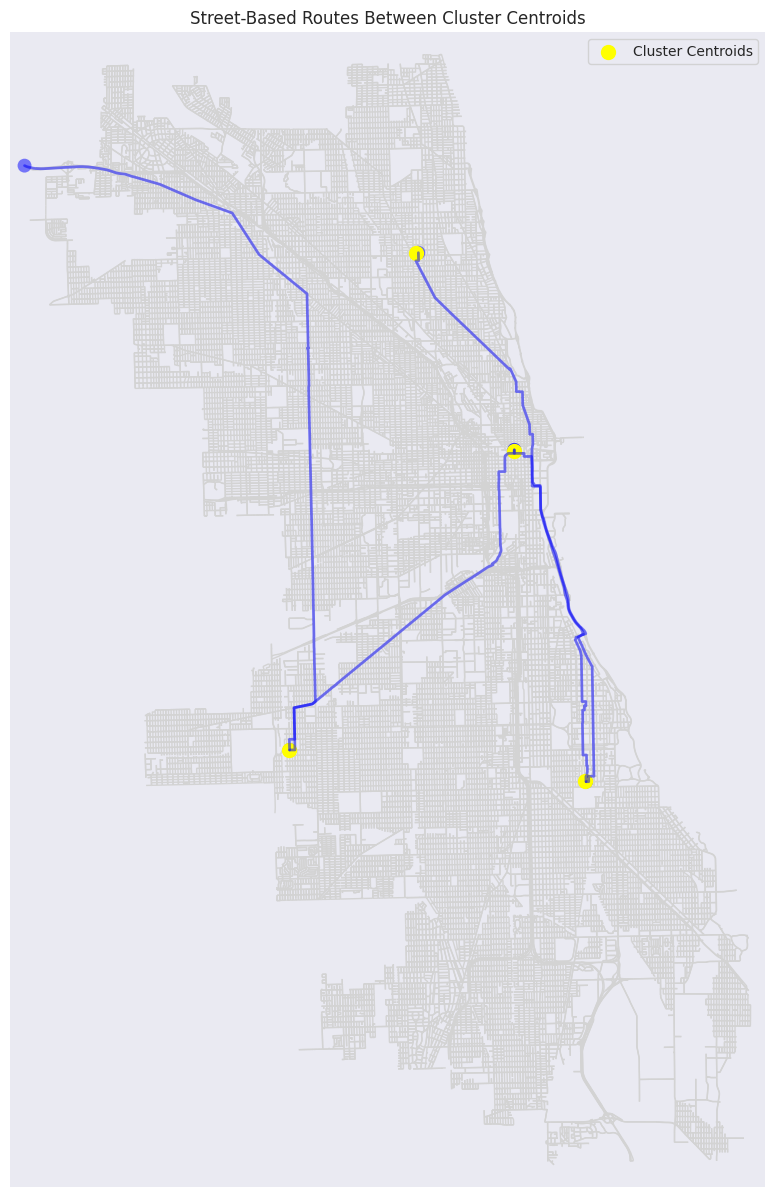

In [22]:
# Plot the road network and the routes
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the road network
ox.plot_graph(GeoData, ax=ax, show=False, close=False, edge_color='lightgray', node_size=0)

# Plot the routes between centroids
for route in routes:
    ox.plot_graph_route(GeoData, route, route_linewidth=2, route_color='blue', ax=ax, show=False, close=False)

# Plot the centroids on top
plt.scatter(centroids[:, 1], centroids[:, 0], color='yellow', marker='o', s=100, label='Cluster Centroids')

# Add labels and title
plt.title('Street-Based Routes Between Cluster Centroids')
plt.legend()

plt.show()

# City infrastructure

## Infrastructure locations

- Find locations of the city infrastructure (airports, stadiums, parks, universities)
using the data and make up your own algorithm of how to find them. Find at least
6 of that kind of location.


In [23]:
def fetch_infrastructure(Map_polygon, tags):
    infrastructure = {}
    for name, tag in tags.items():
        gdf = ox.features_from_polygon(Map_polygon, tags=tag)
        infrastructure[name] = gdf
    return infrastructure

infrastructure_tags = {
    'airports': {'aeroway': 'aerodrome'},
    'stadiums': {'leisure': 'stadium'},
    'parks': {'leisure': 'park'},
    'universities': {'amenity': 'university'},
    'hospitals': {'amenity': 'hospital'},
    'train_stations': {'railway': 'station'}
}
city_infrastructure = fetch_infrastructure(Map_polygon, infrastructure_tags)

## Ploting Infrastructure locations

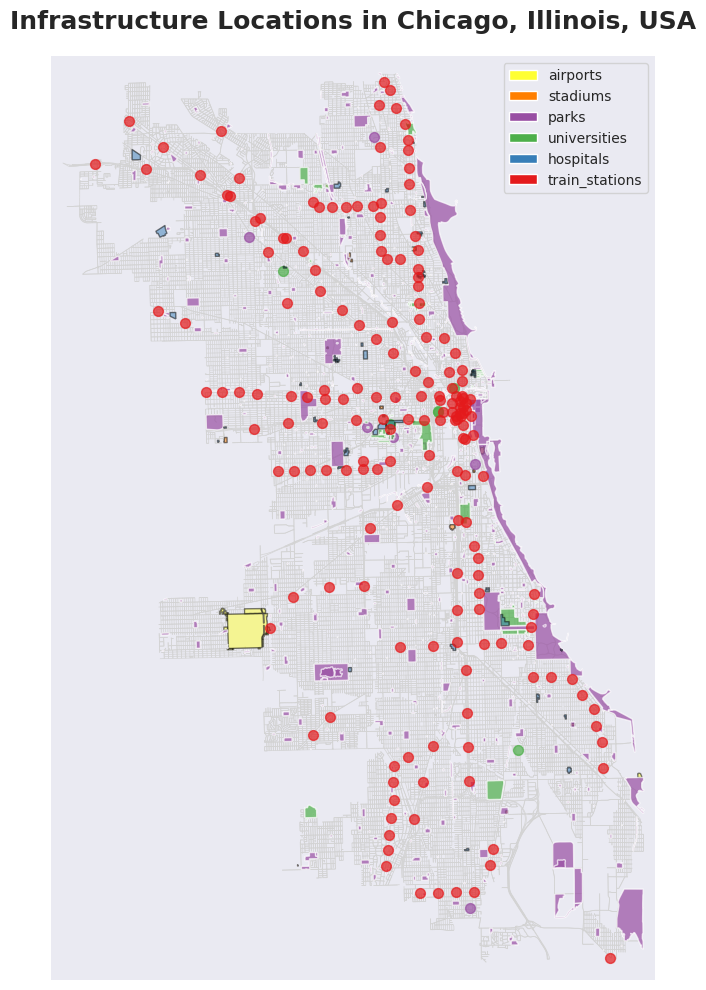

In [24]:
from matplotlib.patches import Patch

fig, ax = plt.subplots(figsize=(12, 12))

ox.plot_graph(GeoData, ax=ax, show=False, close=False, edge_color='lightgray', node_size=0, edge_linewidth=0.5)

colors = ['#e41a1c',  # red
          '#377eb8',  # blue
          '#4daf4a',  # green
          '#984ea3',  # purple
          '#ff7f00',  # orange
          '#ffff33']  # yellow
legend_elements = []
for name, gdf in city_infrastructure.items():
    if not gdf.empty:
        color = colors.pop()
        geom_type = gdf.geom_type.iloc[0]

        if geom_type in ['Point', 'MultiPoint']:
            gdf.plot(ax=ax, markersize=50, color=color, alpha=0.7)
        elif geom_type in ['LineString', 'MultiLineString']:
            gdf.plot(ax=ax, linewidth=2, color=color, alpha=0.7)
        elif geom_type in ['Polygon', 'MultiPolygon']:
            gdf.plot(ax=ax, facecolor=color, edgecolor='k', alpha=0.5)

        legend_elements.append(Patch(facecolor=color, label=name))

plt.title(f'Infrastructure Locations in {place_name}', fontsize=18, fontweight='bold', pad=20)
plt.legend(handles=legend_elements)

plt.show()

## Rush Hour for each Locations

- Find the rush hour for each of the locations – timestamp when the location had the
largest number of dropoffs and save the information into that file : "rush_hours_empty.csv"
(in attachment).


In [25]:
taxi_timestamps_df = taxi_locations_df[['Trip Start Timestamp', 'Trip End Timestamp', 'Pickup Centroid Latitude', 'Pickup Centroid Longitude', 'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude']]
taxi_timestamps_df

def count_Centroids(taxi_df):
    df = taxi_df.copy()
    df['dropoff_lat_rounded'] = df['Dropoff Centroid Latitude'].round(3)
    df['dropoff_lon_rounded'] = df['Dropoff Centroid Longitude'].round(3)
    group_cols = ['dropoff_lat_rounded', 'dropoff_lon_rounded', 'Trip End Timestamp']
    rush_counts = (
        df.groupby(group_cols)
        .size()
        .reset_index(name='num_of_rides')
    )
    df = df.merge(
        rush_counts,
        on=['dropoff_lat_rounded', 'dropoff_lon_rounded', 'Trip End Timestamp'],
        how='left'
    ).sort_values('num_of_rides', ascending=False)
    return df

rush_counts = count_Centroids(taxi_timestamps_df)
rush_counts


,Trip Start Timestamp,Trip End Timestamp,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,dropoff_lat_rounded,dropoff_lon_rounded,num_of_rides
1266919,2019-05-07 08:45:00,2019-05-07 09:00:00,41.879255,-87.642649,41.880994,-87.632746,41.881,-87.633,249
1924384,2019-05-01 08:30:00,2019-05-01 08:45:00,41.879255,-87.642649,41.880994,-87.632746,41.881,-87.633,249
1430093,2019-05-01 08:30:00,2019-05-01 08:45:00,41.885300,-87.642808,41.880994,-87.632746,41.881,-87.633,249
1224023,2019-05-07 09:00:00,2019-05-07 09:00:00,41.885300,-87.642808,41.880994,-87.632746,41.881,-87.633,249
1393444,2019-05-01 08:45:00,2019-05-01 08:45:00,41.899156,-87.626211,41.880994,-87.632746,41.881,-87.633,249
...,...,...,...,...,...,...,...,...,...
209922,2014-09-01 19:45:00,2014-09-01 19:45:00,41.901207,-87.676356,41.899602,-87.633308,41.900,-87.633,1
209923,2014-09-20 23:30:00,2014-09-20 23:45:00,41.870607,-87.622173,41.907520,-87.626659,41.908,-87.627,1
209927,2014-09-03 02:30:00,2014-09-03 02:45:00,41.922761,-87.699155,42.001571,-87.695013,42.002,-87.695,1
209929,2014-09-04 17:30:00,2014-09-04 18:15:00,41.979071,-87.903040,41.909496,-87.630964,41.909,-87.631,1


## Saving Rush Hours

In [26]:
tmp_df = rush_counts.groupby(["dropoff_lat_rounded", "dropoff_lon_rounded"])
tmp_df

In [27]:
location_exemple = (41.880994, -87.632746)
target_date = pd.Timestamp("2019-04-02").date()
THREASH_HOLD = 2

In [28]:
import pandas as pd
import folium
import os
import time
from folium import plugins
import json
from datetime import datetime

df = rush_counts[
    (rush_counts['dropoff_lat_rounded'] == round(location_exemple[0], 3)) &
    (rush_counts['dropoff_lon_rounded'] == round(location_exemple[1], 3)) &
    (rush_counts['Trip End Timestamp'].dt.date == target_date)
].copy()

df = df[df['Trip Start Timestamp'] != df['Trip End Timestamp']]
df = df if len(df) < THREASH_HOLD else df.sample(n=THREASH_HOLD)

df["15min_interval"] = df["Trip End Timestamp"].dt.floor("15min")

In [29]:
df

,Trip Start Timestamp,Trip End Timestamp,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,dropoff_lat_rounded,dropoff_lon_rounded,num_of_rides,15min_interval
861975,2019-04-02 16:00:00,2019-04-02 17:00:00,41.979071,-87.903040,41.880994,-87.632746,41.881,-87.633,3,2019-04-02 17:00:00
850708,2019-04-02 07:30:00,2019-04-02 08:00:00,41.980158,-87.652274,41.880994,-87.632746,41.881,-87.633,8,2019-04-02 08:00:00


In [30]:
# Step 1: Find the nearest nodes in the road network for each ride
def get_route(G, ride):
    pickup_node = ox.distance.nearest_nodes(G, ride['Pickup Centroid Longitude'], ride['Pickup Centroid Latitude'])
    dropoff_node = ox.distance.nearest_nodes(G, ride['Dropoff Centroid Longitude'], ride['Dropoff Centroid Latitude'])

    # Check if a path exists
    if pickup_node is not None and dropoff_node is not None:
        try:
            return nx.shortest_path(G, pickup_node, dropoff_node, weight='length')
        except nx.NetworkXNoPath:
            return None  # Return None if no path exists
    return None  # Return None if nodes are invalid

In [31]:
from datetime import timedelta
from tqdm import tqdm
from folium.plugins import TimestampedGeoJson


m = folium.Map(location=[df['Pickup Centroid Latitude'].mean(), df['Pickup Centroid Longitude'].mean()], zoom_start=12)

features = []
G = ox.graph_from_point((df['Pickup Centroid Latitude'].iloc[0], df['Pickup Centroid Longitude'].iloc[0]), dist=3000, network_type='drive')
for _, row in tqdm(df.iterrows(), total=len(df), desc="Processing rows"):
    try:
        route = get_route(G, row)

        start_time = row['Trip Start Timestamp']
        trip_time_sec = int((row['Trip End Timestamp'] - row['Trip Start Timestamp']).total_seconds())
        time_per_frame = int(trip_time_sec / len(route_coords))
        step_duration = timedelta(seconds=time_per_frame)

        for i in range(1, len(route_coords)):
            feature = {
                "type": "Feature",
                "geometry": {
                    "type": "LineString",
                    "coordinates": [route_coords[i - 1], route_coords[i]]
                },
                "properties": {
                    "times": [
                        (start_time + step_duration * (i - 1)).isoformat(),
                        (start_time + step_duration * i).isoformat()
                    ],
                    "style": {"color": "blue", "weight": 4}
                }
            }
            features.append(feature)

        # Pickup marker
        folium.Marker(
            location=[row['Pickup Centroid Latitude'], row['Pickup Centroid Longitude']],
            icon=folium.Icon(color='green'),
            popup=f"Pickup Point\nTime: {row['Trip Start Timestamp']}"
        ).add_to(m)

        # Dropoff marker
        folium.Marker(
            location=[row['Dropoff Centroid Latitude'], row['Dropoff Centroid Longitude']],
            icon=folium.Icon(color='red'),
            popup=f"Dropoff Point\nTime: {row['Trip End Timestamp']}"
        ).add_to(m)

    except Exception as e:
        continue

TimestampedGeoJson({
    "type": "FeatureCollection",
    "features": features,
}, period="PT5S", add_last_point=False, duration='PT5S').add_to(m)

m

Processing rows: 100%|██████████| 2/2 [00:00<00:00, 49.61it/s]


In [32]:
print(pickup_locations)
print(dropoff_locations)

NameError: name 'pickup_locations' is not defined

# One day of a taxi driver

In [33]:
taxi_locations_df

,Trip ID,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Trip Start Timestamp,Trip End Timestamp,Taxi ID,Fare,Trip Start Hour,Trip Start Day,Trip Start Month
0,304a88bf5d8a7d60c1dbfd88661caa15ee4cb0ea,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.778877,-87.594925,POINT (-87.5949254391 41.7788768603),2014-10-12 20:30:00,2014-10-12 20:45:00,ada14d22a0c2f8c7fe79140611a8e76602acdd8b448282...,19.25,20,Sunday,October
1,b1a8b95ea294663cc3d3cb38a538f464418288c4,41.947792,-87.683835,POINT (-87.6838349425 41.9477915865),41.874005,-87.663518,POINT (-87.6635175498 41.874005383),2014-10-12 20:30:00,2014-10-12 20:45:00,92ab37c26efa3b2659e525a0a2ae31e69c84ffd7bcfef2...,13.05,20,Sunday,October
2,752c8ac4bdf62db4c3d4e810cab915a0ec0ceddc,42.001571,-87.695013,POINT (-87.6950125892 42.001571027),42.001571,-87.695013,POINT (-87.6950125892 42.001571027),2014-09-09 18:00:00,2014-09-09 18:00:00,d06d9962fe86645dd59a7dce41cf27734b23dc62974283...,4.85,18,Tuesday,September
3,6808fa8dc0d009190da2e2416203a7ba012f45a9,41.901567,-87.638404,POINT (-87.6384040116 41.9015669095),41.901567,-87.638404,POINT (-87.6384040116 41.9015669095),2014-10-12 06:30:00,2014-10-12 06:30:00,26d0351db732d6b194d3ae9f29b4a3c53070fdd14aa3c9...,3.25,6,Sunday,October
4,01428cb986d678ea0a8d39b6b35d05d06baa631a,41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),2014-09-07 17:45:00,2014-09-07 18:45:00,25b37d641316c0ca5cb44edf8eaf9f012e2495549f60b7...,38.25,17,Sunday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506289,21bc604a66e2c479f767bdfd6ddfec6a7b57065b,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),2019-06-16 22:30:00,2019-06-16 23:00:00,f6591bb5699bde5f19f3074a76774808dd0e5c941ee0ed...,44.25,22,Sunday,June
2506290,21beff87d222ce3c0e1c62f9278c1ed8a455550a,41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),2019-06-03 11:00:00,2019-06-03 11:15:00,6161b78168fb8a51b06c3994f62522e1d21390a969e3b1...,4.25,11,Monday,June
2506291,21baf5e9060fb66f7b5e11444d32d07275a3a2ee,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),2019-06-15 13:45:00,2019-06-15 13:45:00,025c4a64d4348a8184bbf4109fea03a717b87f48029d95...,10.75,13,Saturday,June
2506292,21bfa342fb04bdf42585c216c9da58cc5a6975f2,41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),2019-06-05 17:15:00,2019-06-05 17:15:00,e39f9fb04c45fac83b35fbc9c36b68ba97cdf877dd76fd...,5.75,17,Wednesday,June


In [34]:
driver_id = "2ea4ad2950f3bbdfdcfa7adb48e0dcee49d8a714b7024342f0302eeb9e891dfd55a6f35bb7bc7af06398fb4f55583e1659cb11b432848296bfd2b7d3084e7de1"
current_day = "2019-05-31"

In [35]:
target_date = pd.Timestamp(current_day).date()

fares_driver_df = taxi_locations_df[
    (taxi_locations_df["Taxi ID"] == driver_id) &
    (taxi_locations_df['Trip End Timestamp'].dt.date == target_date)
].copy()

sum_fares = sum(fares_driver_df["Fare"])
print(f"the current amount of money earned by the selected driver_id in {current_day} is: {sum_fares}$")

the current amount of money earned by the selected driver_id in 2019-05-31 is: 635.5$


In [36]:
import pandas as pd
import folium
import os
import time
from folium.plugins import TimestampedGeoJson
import json
from datetime import datetime

features = []
m = folium.Map(location=[fares_driver_df['Pickup Centroid Latitude'].mean(), fares_driver_df['Pickup Centroid Longitude'].mean()], zoom_start=12)

for _, row in tqdm(fares_driver_df.iterrows(), total=len(fares_driver_df), desc="Processing rows"):
    try:
        G = ox.graph_from_point((row['Pickup Centroid Latitude'], row['Pickup Centroid Longitude']), dist=3000, network_type='drive')
        pickup_node = ox.distance.nearest_nodes(G, X=row['Pickup Centroid Longitude'], Y=row['Pickup Centroid Latitude'])
        dropoff_node = ox.distance.nearest_nodes(G, X=row['Dropoff Centroid Longitude'], Y=row['Dropoff Centroid Latitude'])
        route = nx.shortest_path(G, pickup_node, dropoff_node, weight='length')
        route_coords = [[G.nodes[node]['x'], G.nodes[node]['y']] for node in route]

        timestamp = row['Trip Start Timestamp'].isoformat()
        for i in range(1, len(route_coords)):
            feature = {
                "type": "Feature",
                "geometry": {
                    "type": "LineString",
                    "coordinates": [route_coords[i - 1], route_coords[i]]
                },
                "properties": {
                    "times": [timestamp, timestamp],  # for a static line at one moment
                    "style": {"color": "blue", "weight": 4}
                }
            }
            features.append(feature)

        # Pickup marker
        folium.Marker(
            location=[row['Pickup Centroid Latitude'], row['Pickup Centroid Longitude']],
            icon=folium.Icon(color='green'),
            popup=f"Pickup Point\nTime: {row['Trip Start Timestamp']}"
        ).add_to(m)

        # Dropoff marker
        folium.Marker(
            location=[row['Dropoff Centroid Latitude'], row['Dropoff Centroid Longitude']],
            icon=folium.Icon(color='red'),
            popup=f"Dropoff Point\nTime: {row['Trip End Timestamp']}"
        ).add_to(m)
    except Exception as e:
        continue


TimestampedGeoJson({
    "type": "FeatureCollection",
    "features": features,
}, period="PT15M", add_last_point=False).add_to(m)

m

Processing rows: 100%|██████████| 64/64 [08:24<00:00,  7.89s/it]


# One day of the city

In [37]:
location_exemple = (41.880994, -87.632746)
target_date = pd.Timestamp("2019-05-16").date()
THREASH_HOLD = 100

In [38]:
import pandas as pd
import folium
import os
import time
from folium import plugins
import json
from datetime import datetime

df = rush_counts[rush_counts['Trip End Timestamp'].dt.date == target_date].copy()

df = df if len(df) < THREASH_HOLD else df.sample(n=THREASH_HOLD)

df["15min_interval"] = df["Trip End Timestamp"].dt.floor("15min")

In [39]:
from datetime import timedelta
from tqdm import tqdm
from folium.plugins import TimestampedGeoJson


m = folium.Map(location=[df['Pickup Centroid Latitude'].mean(), df['Pickup Centroid Longitude'].mean()], zoom_start=12)

features = []
for _, row in tqdm(df.iterrows(), total=len(df), desc="Processing rows"):
    try:
        G = ox.graph_from_point((row['Pickup Centroid Latitude'], row['Pickup Centroid Longitude']), dist=3000, network_type='drive')
        pickup_node = ox.distance.nearest_nodes(G, X=row['Pickup Centroid Longitude'], Y=row['Pickup Centroid Latitude'])
        dropoff_node = ox.distance.nearest_nodes(G, X=row['Dropoff Centroid Longitude'], Y=row['Dropoff Centroid Latitude'])
        route = nx.shortest_path(G, pickup_node, dropoff_node, weight='length')
        route_coords = [[G.nodes[node]['x'], G.nodes[node]['y']] for node in route]

        start_time = row['Trip End Timestamp']
        step_duration = timedelta(seconds=1)

        for i in range(1, len(route_coords)):
            feature = {
                "type": "Feature",
                "geometry": {
                    "type": "LineString",
                    "coordinates": [route_coords[i - 1], route_coords[i]]
                },
                "properties": {
                    "times": [
                        (start_time + step_duration * (i - 1)).isoformat(),
                        (start_time + step_duration * i).isoformat()
                    ],
                    "style": {"color": "blue", "weight": 4}
                }
            }
            features.append(feature)

        # Pickup marker
        folium.Marker(
            location=[row['Pickup Centroid Latitude'], row['Pickup Centroid Longitude']],
            icon=folium.Icon(color='green'),
            popup=f"Pickup Point\nTime: {row['Trip Start Timestamp']}"
        ).add_to(m)

        # Dropoff marker
        folium.Marker(
            location=[row['Dropoff Centroid Latitude'], row['Dropoff Centroid Longitude']],
            icon=folium.Icon(color='red'),
            popup=f"Dropoff Point\nTime: {row['Trip End Timestamp']}"
        ).add_to(m)

    except Exception as e:
        continue

TimestampedGeoJson({
    "type": "FeatureCollection",
    "features": features,
}, period="PT5S", add_last_point=False, duration='PT5S').add_to(m)

m

Processing rows: 100%|██████████| 100/100 [13:00<00:00,  7.81s/it]
